In [26]:
# Importação das bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [27]:
# Leitura do conjunto de dados
df = pd.read_csv("Mall_Customers.csv")

# Exibição das primeiras linhas do conjunto de dados
df[:10]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [28]:
# Informações básicas sobre o conjunto de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [29]:
# Estatísticas descritivas
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


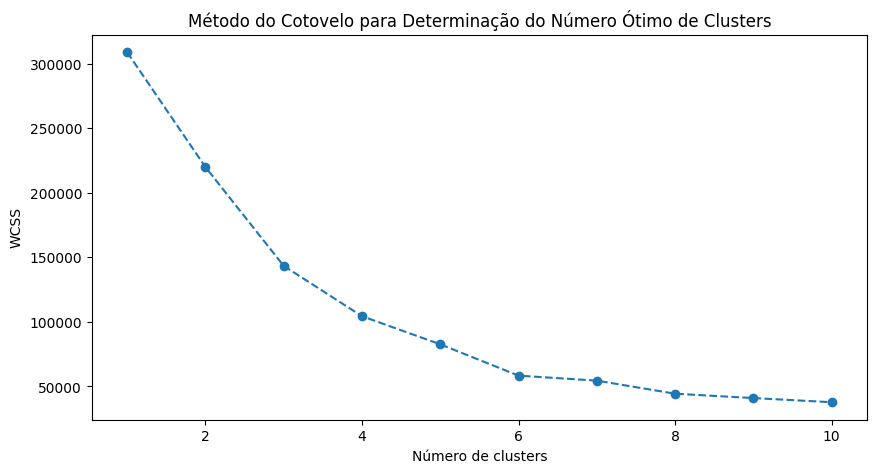

In [64]:
df_out = df.copy()

# Seleção de características para a clusterização
X = df_out[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values

# Determinando o número ótimo de clusters usando o método do cotovelo
wcss = []  # Within-cluster sum of square
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=52)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plotando o método do cotovelo
plt.figure(figsize=(10,5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Método do Cotovelo para Determinação do Número Ótimo de Clusters')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.show()

Estatísticas do Cluster 1:


,Age,Annual Income (k$),Spending Score (1-100)
count,95.000000,95.000000,95.000000
mean,44.894737,48.705263,42.631579
std,15.341831,14.522817,14.713616
min,18.000000,16.000000,3.000000
25%,32.000000,40.000000,40.500000
50%,48.000000,54.000000,47.000000
75%,56.000000,61.000000,52.000000
max,70.000000,69.000000,60.000000


Estatísticas do Cluster 2:


,Age,Annual Income (k$),Spending Score (1-100)
count,38.000000,38.000000,38.000000
mean,40.394737,87.000000,18.631579
std,11.376931,16.271348,10.915947
min,19.000000,70.000000,1.000000
25%,34.000000,76.250000,10.250000
50%,41.500000,80.000000,16.500000
75%,47.000000,96.000000,26.750000
max,59.000000,137.000000,40.000000


Estatísticas do Cluster 3:


,Age,Annual Income (k$),Spending Score (1-100)
count,28.000000,28.000000,28.000000
mean,24.821429,28.714286,74.250000
std,5.571446,10.384665,14.075524
min,18.000000,15.000000,39.000000
25%,20.750000,19.750000,64.000000
50%,23.000000,28.000000,74.000000
75%,30.000000,37.250000,81.250000
max,35.000000,48.000000,99.000000


Estatísticas do Cluster 4:


,Age,Annual Income (k$),Spending Score (1-100)
count,39.000000,39.000000,39.000000
mean,32.692308,86.538462,82.128205
std,3.728650,16.312485,9.364489
min,27.000000,69.000000,63.000000
25%,30.000000,75.500000,74.500000
50%,32.000000,79.000000,83.000000
75%,35.500000,95.000000,90.000000
max,40.000000,137.000000,97.000000


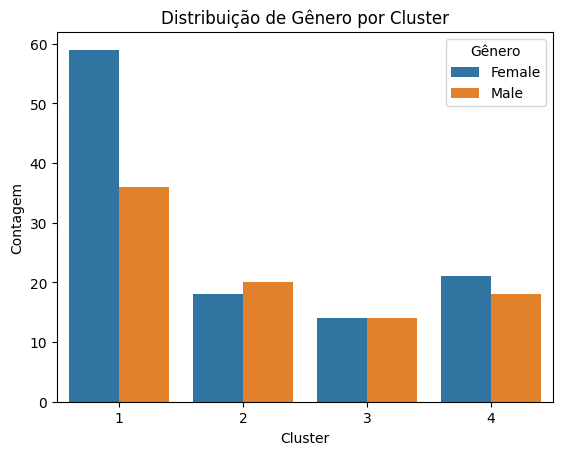

In [71]:
# Aplicando K-means com 4 clusters
n_clusters_optimo = 4

kmeans = KMeans(n_clusters=n_clusters_optimo, init='k-means++', max_iter=300, n_init=10, random_state=52)
y_kmeans = kmeans.fit_predict(X)

# Adicionar os labels dos clusters ao DataFrame
df_out['Cluster'] = y_kmeans + 1

# Estatísticas descritivas por cluster
for i in range(df_out['Cluster'].nunique()):
    print(f"Estatísticas do Cluster {i+1}:")
    display(df_out.drop(columns='CustomerID')[df_out['Cluster'] == i+1].describe(include='int64'))

# Gráfico de distribuição de gênero por cluster
sns.countplot(x='Cluster', hue='Gender', data=df_out)
plt.title('Distribuição de Gênero por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Contagem')
plt.legend(title='Gênero')
plt.show()

# Supondo que df_original já tenha a coluna 'Cluster' adicionada
fig = px.scatter_3d(df_out, x='Age', y='Annual Income (k$)', z='Spending Score (1-100)',
                    color='Cluster', # Colorindo os pontos com base no cluster
                    title='Análise de Cluster: Idade, Renda Anual e Pontuação de Gastos',
                    labels={'Cluster': 'Cluster'},
                    opacity=0.7, # Ajustando a opacidade para melhor visualização
                    width=800, height=500) 

# Melhorando o layout
fig.update_layout(margin=dict(l=15, r=15, b=10, t=75))

# Exibindo o gráfico
fig.show()

### Análise dos Clusters

**Cluster 1:**
- Composto principalmente por indivíduos mais velhos, com média de idade de aproximadamente 45 anos.
- Apresenta uma renda anual moderada, com média de cerca de R$48,7 mil.
- A pontuação de gastos é moderada, com média em torno de 42,6, indicando um comportamento de consumo equilibrado.
- Este é o maior grupo, com 95 indivíduos, mostrando variação considerável em idade, renda e pontuação de gastos.
- A distribuição de gênero neste cluster mostra uma predominância feminina.

**Cluster 2:**
- Este grupo é ligeiramente mais jovem que o Cluster 1, com média de idade de 40 anos.
- Tem uma renda anual mais alta, com média de R$87 mil, significativamente superior à do Cluster 1.
- No entanto, a pontuação de gastos é bastante baixa, com média de 18,6, o que sugere que, apesar de terem rendas mais altas, eles gastam menos.
- Composto por 38 indivíduos, este cluster tem uma ampla faixa de renda, conforme indicado pelo alto desvio padrão.
- A distribuição de gênero é equilibrada.

**Cluster 3:**
- Este é o cluster mais jovem, com média de idade em torno de 25 anos.
- Tem a menor renda média anual, cerca de R$28,7 mil.
- Apesar da renda menor, possui uma alta pontuação de gastos, com média de 74,25, sugerindo que podem priorizar gastos com estilo de vida ou itens não essenciais.
- É o menor grupo, com 28 indivíduos, e apresenta a menor variação em idade e pontuação de gastos.
- A distribuição de gênero é equilibrada, como observado no gráfico de barras.

**Cluster 4:**
- Com uma média de idade em torno de 33 anos, este grupo é o segundo mais jovem.
- Sua renda anual média é alta, aproximadamente R$86,5 mil, comparável ao Cluster 2.
- A pontuação de gastos também é alta, com média de 82,1, indicando que esse grupo pode incluir pessoas com altas rendas que também gastam bastante.
- O grupo é composto por 39 indivíduos e tem um desvio padrão mais baixo para a idade, indicando que os membros são agrupados de forma mais próxima pela idade.
- A distribuição de gênero também é equilibrada.